In [1]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from scipy.cluster.vq import whiten, kmeans2

In [3]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': '4aa8c631d3224761bdea6d1952986285' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [4]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/496/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/496/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/496'}},
  'code': None,
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/6/63/Rio_Ave_FC.svg',
  'name': 'FC Rio Ave',
  'shortName': 'Rio Ave',
  'squadMarketValue': '21,125,000 €'},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/503/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/503/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/503'}},
  'code': 'FCP',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/e/ed/FC_Porto_1922-2005.svg',
  'name': 'FC Porto',
  'shortName': 'Porto',
  'squadMarketValue': '204,900,000 €'},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/583/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/583/players

In [5]:
for team in teams:
    if (team['squadMarketValue']):
        marketValue = team['squadMarketValue'].replace(",", "").replace(" €", "")
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    loss = 0
    for f in fixtures:
        if team['name'] == f['homeTeamName']:
            loss += f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0
        else:
            loss += f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0
    print('Team "{}", {} €, {} losses'.format(team['name'], marketValue, loss))
    team['squadMarketValue'] = marketValue
    team['loss'] = loss

Team "FC Rio Ave", 21125000 €, 29 losses
Team "FC Porto", 204900000 €, 17 losses
Team "Moreirense FC", 9950000 €, 36 losses
Team "FC Paços de Ferreira", 17725000 €, 35 losses
Team "Sporting CP", 220250000 €, 32 losses
Team "Maritimo Funchal", 18275000 €, 17 losses
Team "CD Tondela", 11575000 €, 39 losses
Team "SL Benfica", 180150000 €, 23 losses
Team "Boavista Porto FC", 14025000 €, 25 losses
Team "FC Arouca", 18025000 €, 32 losses
Team "Vitoria Setubal", 21200000 €, 23 losses
Team "C.F. Os Belenenses", 23650000 €, 21 losses
Team "Vitoria Guimaraes", 32850000 €, 25 losses
Team "Sporting Braga", 63800000 €, 20 losses
Team "GD Estoril Praia", 12950000 €, 29 losses
Team "Feirense", 12950000 €, 35 losses
Team "Nacional Funchal", 21925000 €, 33 losses
Team "G.D. Chaves", 21925000 €, 22 losses


In [7]:
team_for_pd = []
for team in teams:
    team_for_pd.append({'name': team['name'], 'marketValue': int(team['squadMarketValue'].replace(",", "").replace(" €", "")), 'loss': team['loss']})
team_for_pd

[{'loss': 29, 'marketValue': 21125000, 'name': 'FC Rio Ave'},
 {'loss': 17, 'marketValue': 204900000, 'name': 'FC Porto'},
 {'loss': 36, 'marketValue': 9950000, 'name': 'Moreirense FC'},
 {'loss': 35, 'marketValue': 17725000, 'name': 'FC Paços de Ferreira'},
 {'loss': 32, 'marketValue': 220250000, 'name': 'Sporting CP'},
 {'loss': 17, 'marketValue': 18275000, 'name': 'Maritimo Funchal'},
 {'loss': 39, 'marketValue': 11575000, 'name': 'CD Tondela'},
 {'loss': 23, 'marketValue': 180150000, 'name': 'SL Benfica'},
 {'loss': 25, 'marketValue': 14025000, 'name': 'Boavista Porto FC'},
 {'loss': 32, 'marketValue': 18025000, 'name': 'FC Arouca'},
 {'loss': 23, 'marketValue': 21200000, 'name': 'Vitoria Setubal'},
 {'loss': 21, 'marketValue': 23650000, 'name': 'C.F. Os Belenenses'},
 {'loss': 25, 'marketValue': 32850000, 'name': 'Vitoria Guimaraes'},
 {'loss': 20, 'marketValue': 63800000, 'name': 'Sporting Braga'},
 {'loss': 29, 'marketValue': 12950000, 'name': 'GD Estoril Praia'},
 {'loss': 35, 

In [8]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,loss,marketValue,name
0,29,21125000,FC Rio Ave
1,17,204900000,FC Porto
2,36,9950000,Moreirense FC
3,35,17725000,FC Paços de Ferreira
4,32,220250000,Sporting CP
5,17,18275000,Maritimo Funchal
6,39,11575000,CD Tondela
7,23,180150000,SL Benfica
8,25,14025000,Boavista Porto FC
9,32,18025000,FC Arouca


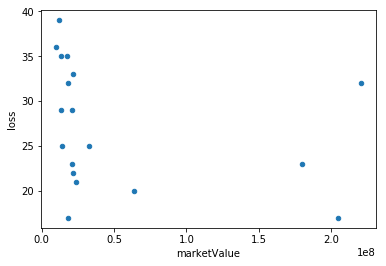

In [9]:
teams_pd.plot.scatter(x='marketValue', y='loss')

In [10]:
del teams_pd['name']
teams_pd

,loss,marketValue
0,29,21125000
1,17,204900000
2,36,9950000
3,35,17725000
4,32,220250000
5,17,18275000
6,39,11575000
7,23,180150000
8,25,14025000
9,32,18025000


In [11]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 4.36564125,  0.30834765],
       [ 2.55916901,  2.99078971],
       [ 5.41941672,  0.14523357],
       [ 5.26887737,  0.2587201 ],
       [ 4.81725931,  3.2148435 ],
       [ 2.55916901,  0.26674808],
       [ 5.87103479,  0.16895262],
       [ 3.46240513,  2.62953034],
       [ 3.76348384,  0.20471364],
       [ 4.81725931,  0.263099  ],
       [ 3.46240513,  0.30944237],
       [ 3.16132642,  0.3452034 ],
       [ 3.76348384,  0.47948971],
       [ 3.01078707,  0.93124638],
       [ 4.36564125,  0.18902258],
       [ 5.26887737,  0.18902258],
       [ 4.96779866,  0.32002472],
       [ 3.31186578,  0.32002472]])

In [12]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 5.04306834,  0.23030285],
        [ 3.61294448,  2.94505452],
        [ 3.29036015,  0.40812404]]),
 array([0, 1, 0, 0, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2]))

In [13]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['r',
 'g',
 'r',
 'r',
 'g',
 'b',
 'r',
 'g',
 'b',
 'r',
 'b',
 'b',
 'b',
 'b',
 'r',
 'r',
 'r',
 'b']

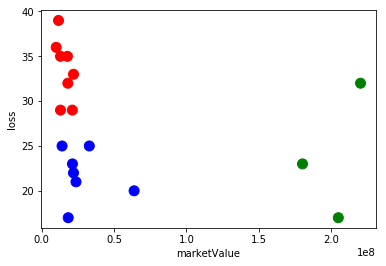

In [15]:
teams_pd.plot.scatter(x='marketValue', y='loss', c=colors, s=100)

In [17]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[ 5.87103479,  0.16895262],
        [ 3.61294448,  2.94505452],
        [ 4.06456254,  0.2953934 ],
        [ 5.14844589,  0.23521999],
        [ 3.10111068,  0.43453299]]),
 array([2, 1, 3, 3, 1, 4, 0, 1, 2, 3, 4, 4, 2, 4, 2, 3, 3, 4]))

In [18]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['b',
 'g',
 'y',
 'y',
 'g',
 'm',
 'r',
 'g',
 'b',
 'y',
 'm',
 'm',
 'b',
 'm',
 'b',
 'y',
 'y',
 'm']

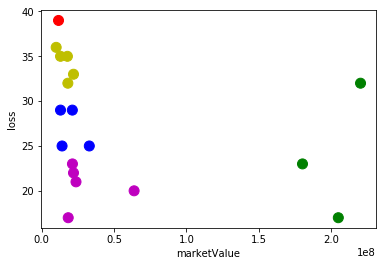

In [20]:
teams_pd.plot.scatter(x='marketValue', y='loss', c=colors, s=100)